# Regressão Linear Simples - Trabalho

## Estudo de caso: Seguro de automóvel sueco

Agora, sabemos como implementar um modelo de regressão linear simples. Vamos aplicá-lo ao conjunto de dados do seguro de automóveis sueco. Esta seção assume que você baixou o conjunto de dados para o arquivo insurance.csv, o qual está disponível no notebook respectivo.

O conjunto de dados envolve a previsão do pagamento total de todas as reclamações em milhares de Kronor sueco, dado o número total de reclamações. É um dataset composto por 63 observações com 1 variável de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Número de reivindicações.
2. Pagamento total para todas as reclamações em milhares de Kronor sueco.

Voce deve adicionar algumas funções acessórias à regressão linear simples. Especificamente, uma função para carregar o arquivo CSV chamado *load_csv ()*, uma função para converter um conjunto de dados carregado para números chamado *str_column_to_float ()*, uma função para avaliar um algoritmo usando um conjunto de treino e teste chamado *split_train_split ()*, a função para calcular RMSE chamado *rmse_metric ()* e uma função para avaliar um algoritmo chamado *evaluate_algorithm()*.

Utilize um conjunto de dados de treinamento de 60% dos dados para preparar o modelo. As previsões devem ser feitas nos restantes 40%. 

Compare a performabce do seu algoritmo com o algoritmo baseline, o qual utiliza a média dos pagamentos realizados para realizar a predição ( a média é 72,251 mil Kronor).


### Aluno: Marcos Felipe de Menezes Mota - 354080

In [1]:
# Calculate the mean value of a list of numbers
def mean(values):
  return sum(values) / float(len(values))


# Calculate the variance of a list of numbers
def variance(values, mean):
  return sum([(x-mean)**2 for x in values])


# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
  covar = 0.0
  for i in range(len(x)):
    covar += (x[i] - mean_x) * (y[i] - mean_y)
  return covar


# Calculate coefficients
def coefficients(dataset):
      x = [row[0] for row in dataset]
      y = [row[1] for row in dataset]
      x_mean, y_mean = mean(x), mean(y)
      b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
      b0 = y_mean - b1 * x_mean
      return [b0, b1]


def simple_linear_regression(train, test):
  predictions = list()
  b0, b1 = coefficients(train)
  for row in test:
    ypred = b0 + b1 * row[0]
    predictions.append(ypred)
  return predictions

from math import sqrt

# Calculate root mean squared error
def rmse_metric(actual, predicted):
  sum_error = 0.0
  for i in range(len(actual)):
    prediction_error = predicted[i] - actual[i]
    sum_error += (prediction_error ** 2)
  mean_error = sum_error / float(len(actual))
  return sqrt(mean_error)

# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
  test_set = list()
  for row in dataset:
    row_copy = list(row)
    row_copy[-1] = None
    test_set.append(row_copy)
  predicted = algorithm(dataset, test_set)
  print(predicted)
  actual = [row[-1] for row in dataset]
  rmse = rmse_metric(actual, predicted)
  return rmse



In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = pd.read_csv("insurance.csv")
dataset = dataset.iloc[:, :].values
# y = dataset.iloc[:, -1].values
data_train, data_test = train_test_split(dataset, test_size=0.4, random_state=0)

In [31]:
data_train = data_train
data_test = data_test
b0, b1 =  coefficients(data_train)
print(b0, b1)

19.6507219828 3.58141779557


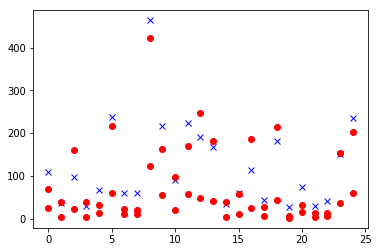

In [37]:
predicted = simple_linear_regression(data_train, data_test)
fig, ax = plt.subplots()
ax.plot(predicted, 'bx')
ax.plot(data_test, 'ro')

In [41]:
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print("rmse:", rmse)

[84.827199877560176, 64.419036530123094, 441.97005845770917, 156.25577159358997, 214.07890107799506, 98.432642109184897, 67.820397088029267, 173.26257438312089, 54.214954856404539, 37.208152066873637, 183.46665605683944, 57.616315414310719, 98.432642109184897, 44.010873182685998, 27.004070393155089, 101.83400266709108, 40.609512624779818, 30.405430951061273, 98.432642109184897, 40.609512624779818, 50.813594298498359, 50.813594298498359, 30.405430951061273, 118.84080545662198, 44.010873182685998, 33.80679150896745, 88.228560435466349, 44.010873182685998, 33.80679150896745, 20.201349277342729, 105.23536322499726, 40.609512624779818, 37.208152066873637, 95.03128155127871, 57.616315414310719, 227.68434330961978, 61.017675972216907, 33.80679150896745, 74.623118203841628, 64.419036530123094, 224.2829827517136, 159.65713215149617, 146.05168991987142, 207.27617996218268, 159.65713215149617, 57.616315414310719, 112.03808434080962, 47.412233740592178, 30.405430951061273, 78.024478761747815, 64.4